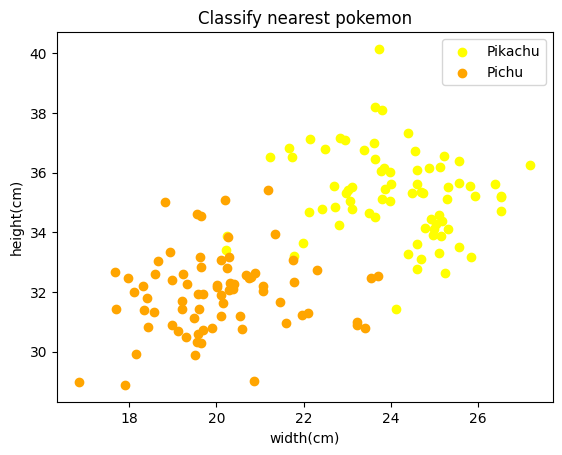

9.17877987534291
Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22.0, 34.0) classified as Pikachu
Sample with (width, height): (20.5, 34.0) classified as Pichu


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# GRUNDUPPGIFT
# 1. läs in datan och spara i lämplig datatstruktur
with open('/home/lucas05/Github/python-programming-Lucas-ZachauFriborg/Labs/Labb 2/datapoints.txt', 'r') as datafile:    # läser in datan från datapoints.txt
    data = datafile.read().splitlines()    # sparar datan in variabeln data och delar upp datan rad för rad i en lista
data.pop(0)    # tar bort första raden (width (cm), height (cm), label (0-pichu, 1-pikachu))

dataset = []
for line in data:
    parts = line.split(',')    # delar upp raden i delar
    w = float(parts[0])
    h = float(parts[1])
    l = parts[2].strip()    # tar bort mellanslag/radbrytningar med .strip()
    if l == '0':    # gör om 0/1 till namn direkt, för utskriften på # 6.
        l = 'Pichu'
    elif l == '1':
        l = 'Pikachu'

    dataset.append((w, h, l))

# 2. Plotta
pikachu_x = []    # skapar listor för pikachus och pichus bredd och längd
pikachu_y = []
pichu_x = []
pichu_y = []

for w, h, label in dataset:    # lägger in deras bredd och längd i varsina listor
    if label == 'Pikachu':
        pikachu_x.append(w)
        pikachu_y.append(h)
    else:
        pichu_x.append(w)
        pichu_y.append(h)

plt.title('Classify nearest pokemon')
plt.xlabel('width(cm)')
plt.ylabel('height(cm)')
plt.scatter(pikachu_x, pikachu_y, color = 'yellow', label = 'Pikachu')    # plottar ut dem
plt.scatter(pichu_x, pichu_y, color = 'orange', label = 'Pichu')
plt.legend()
plt.show()

# 3. Läs in testpunkter
testpoints = []
with open('testpoints.txt', 'r') as testfile:
    testdata = testfile.read().splitlines()

for line in testdata[1:]:    # Hoppar över första raden 'Test points:'
    line.strip()
    line = line.split('.',1)[1].strip()    # tar bort '1.' och '2.' osv
    line = line.replace('(', '').replace(')', '')    # tar bort parenteserna

    parts = line.split(',') # delar vid kommatecken
    w = float(parts[0])
    h = float(parts[1])
    testpoints.append((w, h))

# 4. Beräkna avstånd mellan testpunkt och träningspunkter
def distance (p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# 5. Närmaste punkten till antingen pichu eller pikachu
def classify_nearest(test_point):    # skapar en funktion som tar testpunkt(w, h) och hittar den närmaste punkten i dataset
    nearest = None
    nearest_dist = float('inf')
    for w, h, label in dataset:
        d = distance(test_point, (w, h))
        if d < nearest_dist:
            nearest_dist = d
            nearest = label
    return nearest

# 6. Klassificera testpunkt som pichu eller pikachu
for tp in testpoints:
    print(f'Sample with (width, height): {tp} classified as {classify_nearest(tp)}')

